In [176]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [177]:
shampoo=pd.read_excel('shampoo_with_exog.xlsx')

In [178]:
shampoo.head()

,Month,Sales,Inflation
0,2021-01-01,266.0,1
1,2021-01-02,145.9,3
2,2021-01-03,183.1,5
3,2021-01-04,119.3,5
4,2021-01-05,180.3,4


In [179]:
type(shampoo)

pandas.core.frame.DataFrame

In [180]:
shampoo=pd.read_excel(r'shampoo_with_exog.xlsx',index_col=[0],parse_dates=True,squeeze=True)

In [181]:
type(shampoo)

pandas.core.frame.DataFrame

In [182]:

shampoo.drop('Inflation',axis=1,inplace=True)

<AxesSubplot:xlabel='Month'>

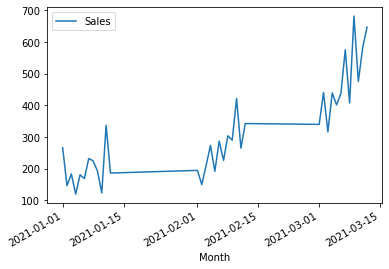

In [183]:
shampoo.plot()

<AxesSubplot:xlabel='Month'>

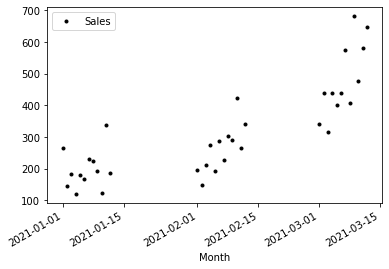

In [184]:
shampoo.plot(style='k.')

In [185]:
shampoo.size

36

In [186]:
shampoo.describe()

,Sales
count,36.000000
mean,312.600000
std,148.937164
min,119.300000
25%,192.450000
50%,280.150000
75%,411.100000
max,682.000000


In [187]:
shampoo_moving_average = shampoo.rolling(window=10).mean()

<AxesSubplot:xlabel='Month'>

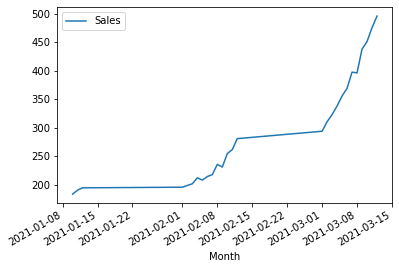

In [188]:

shampoo_moving_average.plot()

In [189]:
shampoo1_base = pd.concat([shampoo,shampoo.shift(1)],axis=1)

In [190]:
shampoo1_base

,Sales,Sales
Month,,
2021-01-01,266.0,NaN
2021-01-02,145.9,266.0
2021-01-03,183.1,145.9
2021-01-04,119.3,183.1
2021-01-05,180.3,119.3
2021-01-06,168.5,180.3
2021-01-07,231.8,168.5
2021-01-08,224.5,231.8
2021-01-09,192.8,224.5


In [191]:
shampoo1_base.columns = ['Actual_Sales','Forecast_Sales']

In [192]:
shampoo1_base.head()

,Actual_Sales,Forecast_Sales
Month,,
2021-01-01,266.0,NaN
2021-01-02,145.9,266.0
2021-01-03,183.1,145.9
2021-01-04,119.3,183.1
2021-01-05,180.3,119.3


In [193]:
shampoo1_base.dropna(inplace=True)

In [194]:
shampoo1_base.head()

,Actual_Sales,Forecast_Sales
Month,,
2021-01-02,145.9,266.0
2021-01-03,183.1,145.9
2021-01-04,119.3,183.1
2021-01-05,180.3,119.3
2021-01-06,168.5,180.3


In [195]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [196]:
shampoo_error = mean_squared_error(shampoo1_base.Actual_Sales,shampoo1_base.Forecast_Sales)

In [197]:

shampoo_error

11715.388285714285

In [198]:
np.sqrt(shampoo_error)

108.23764726616282

In [199]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

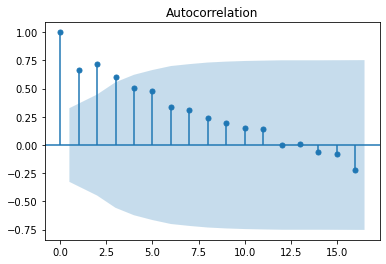

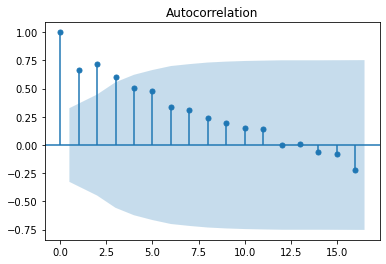

In [200]:
plot_acf(shampoo)
# q = 3

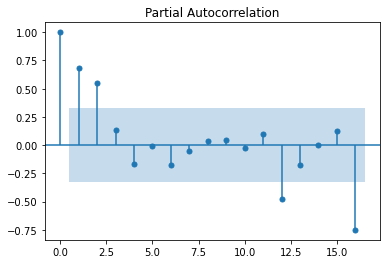

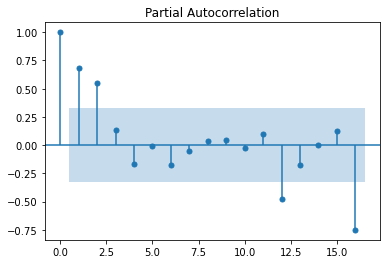

In [201]:

plot_pacf(shampoo)
# q -3 p -2, d 0-2

In [202]:
from statsmodels.tsa.arima_model import ARIMA

In [203]:
shampoo_train = shampoo1[0:25]
shampoo_test = shampoo1[25:37]

In [206]:
shampoo_model = ARIMA(shampoo_train,order=(3,1,2))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

ValueError: endog is required to have ndim 1 but has ndim 2

In [ ]:

shampoo_model = ARIMA(shampoo_train,order=(4,1,3))

In [ ]:

shampoo_model_fit.aic

In [ ]:
shampoo_forecast = shampoo_model_fit.forecast(steps=11)[0]

In [ ]:
np.sqrt(mean_squared_error(shampoo_test,shampoo_forecast))
# Since the root mean squared error here is higher than the root mean squared error for the baseline, this shows that the baseline outperformed the ARIMA model in this scenario.